# Reading Dutch Datasets

Pastas comes with several helpful functions for reading data from files from common data sources in the Netherlands. These sources include:
- [Dinoloket](https://www.dinoloket.nl/ondergrondgegevens): for groundwater and surface water level timeseries.
- [KNMI](http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi): for precipitation and timeseries timeseries
- Waterbase: for surface water level timeseries from Rijkswaterstaat.
- [Menyanthes](https://www.kwrwater.nl/tools-producten/menyanthes/): read files created by Menyanthes

The functionality for reading files from Dinoloket is shown in this notebook. 

First, start with the necessesary imports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pastas as ps

ps.show_versions()

Python version: 3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:33:30) 
[Clang 9.0.1 ]
Numpy version: 1.18.5
Scipy version: 1.4.0
Pandas version: 1.0.5
Pastas version: 0.15.0b


For reading groundwater level timeseries there is the `read_dino` function. For river level gauge data there is the `read_dino_level_gauge` function. These functions are available at the module level. The code below loads these timeseries from CSV files in the data directory.

In [2]:
gw_levels = ps.read_dino(r'../data/B49F0555001_1.csv')
river_levels = ps.read_dino_level_gauge(r'../data/P43H0001.csv')

INFO: Cannot determine frequency of series B49F0555_1
INFO: Time Series B49F0555_1: 14 nan-value(s) was/were found and filled with: drop
INFO: Cannot determine frequency of series P43H0001
INFO: Time Series P43H0001: 49 nan-value(s) was/were found and filled with: drop


Note that these `pastas.Timeseries` objects contain metadata, i.e. for the `river_levels`:

In [3]:
river_levels.metadata

{'x': 94536.0,
 'y': 400012.0,
 'z': nan,
 'projection': 'epsg:28992',
 'Locatie': 'P43H0001',
 'Externe aanduiding': '',
 'X-coordinaat': '94536',
 'Y-coordinaat': '400012',
 ' Startdatum': '14-08-2003',
 ' Einddatum': '28-10-2019'}

The resulting `pastas.TimeSeries` come with their own plot methods, to quickly visualize the data:

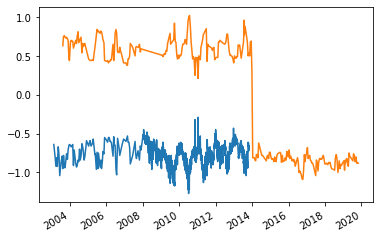

In [4]:
ax = gw_levels.plot()
river_levels.plot()

As can be observed in the plot above, something went wrong with the registration of the river levels in the field. The shows a huge downward shift at the end of 2014. The negative values from end of 2014 onwards are assummed to be correct. The positive values were registered incorrectly (missing a minus sign). 

We fix the timeseries by updating the `TimeSeries` attribute called `series_original`. The `update_series` method is called in order to renew derived attributes.

In [5]:
river_levels.series_original = river_levels.series_original.abs() * -1  # set positive values to negative
river_levels.update_series()

INFO: Cannot determine frequency of series P43H0001
INFO: Time Series P43H0001: 49 nan-value(s) was/were found and filled with: drop


Plot the timeseries again, to see if the applied fix looks reasonable:

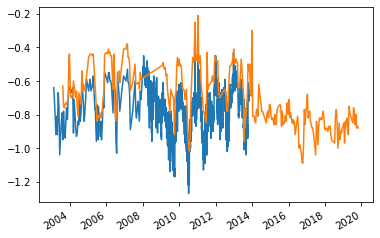

In [6]:
gw_levels.plot()
river_levels.plot()

Another option for loading river levels is the `DinoPeilschaal` reader class. This creates a `DinoPeilschaal` object containing the data and the metadata. These are accessible through the `data` and `meta` attributes, respectively. 

The difference with the previous method is that the original data is available as a pandas.DataFrame when using this method.


In [7]:
river_levels_obj = ps.read.dinoloket.DinoPeilschaal(r'../data/P43H0001.csv')

View the original data:

In [8]:
river_levels_obj.data.head()

,Locatie,Stand_cm_tov_NAP,Bijzonderheid
Peildatum,,,
2003-08-14,P43H0001,63.0,NaN
2003-08-28,P43H0001,75.0,NaN
2003-09-14,P43H0001,76.0,NaN
2003-09-28,P43H0001,74.0,NaN
2003-10-14,P43H0001,73.0,NaN


The metadata:

In [9]:
river_levels_obj.meta

[{'Locatie': 'P43H0001',
  'Externe aanduiding': '',
  'X-coordinaat': '94536',
  'Y-coordinaat': '400012',
  ' Startdatum': '14-08-2003',
  ' Einddatum': '28-10-2019'}]